In [ ]:
import numpy as np
import pandas as pd
import os
import sys
import glob
import tqdm
from typing import List

from matplotlib import pyplot as plt

sys.path.append("..")
from src import text_extraction, create_sentence_nace_code_similarities, analysis_functions

In [56]:
reports = glob.glob("/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/paragraph_sliding_window_3_similarities/*.csv")
reports

['/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/paragraph_sliding_window_3_similarities/rheinmetall-ag_2023.csv',
 '/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/paragraph_sliding_window_3_similarities/conti_annual-report-2023-data.csv',
 '/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/paragraph_sliding_window_3_similarities/heidelberg-materials_2023.csv',
 '/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/paragraph_sliding_window_3_similarities/Siemens-Annual-Report-2023.csv',
 '/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/paragraph_sliding_window_3_similarities/thyssenkrupp-GB_2023-2024_EN_WEB.csv',
 '/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/paragraph_sliding_window_3_similarities/Zalando-SE_DE_241203_s.csv',
 '/Users/hendrikweichel/projects/NaceCodeClassification

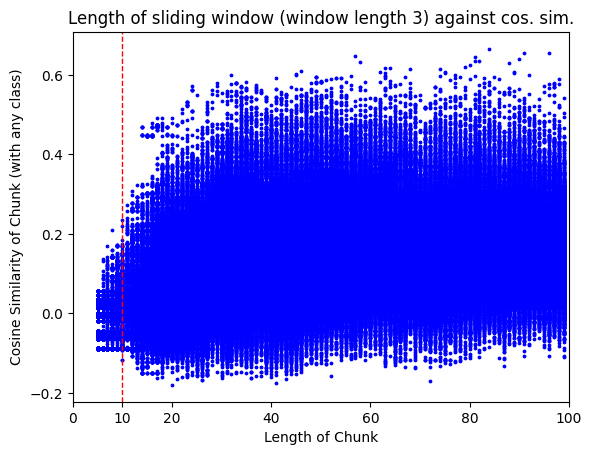

In [59]:
fig = plt.figure()
for report in reports: 
    df = pd.read_csv(report)
    scores = df[[column for column in df.columns if "Scores" in column]]
    df["len"] = df["Sentences"].apply(lambda x: len(x))
    df = df[df["len"]< 100]
    for score in scores: 
        plt.scatter(df["len"], df[score], c="b", s=3)

plt.xlim([0,100])
plt.xlabel("Length of Chunk")
plt.ylabel("Cosine Similarity of Chunk (with any class)")
plt.title("Length of sliding window (window length 3) against cos. sim.")
plt.axvline(x=10, color='red', linestyle='--', linewidth=1)
plt.xticks(list(plt.xticks()[0]) + [10])
plt.savefig("compare_length_sim_german_annual_reports_sentence.png")
fig.savefig("compare_length_sim_german_annual_reports_sentence.pdf", format="pdf", bbox_inches='tight')
plt.show()

In [53]:
# reports = glob.glob("/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/sentence_similarities/*.csv")

In [54]:
# fig = plt.figure()
# for report in reports: 
#     df = pd.read_csv(report)
#     scores = df[[column for column in df.columns if "Scores" in column]]
#     df["len"] = df["Sentences"].apply(lambda x: len(x))
#     df = df[df["len"]< 100]
#     len(df["len"]), len(df[scores])
#     for score in scores: 
#         plt.scatter(df["len"], df[score], c="b", s=3)

# plt.xlim([0,100])
# plt.xlabel("Length of Chunk")
# plt.ylabel("Cosine Similarity of Chunk (with any class)")
# plt.title("Length of sliding window (length 3) against cos. sim.")
# plt.axvline(x=10, color='red', linestyle='--', linewidth=1)
# plt.xticks(list(plt.xticks()[0]) + [10])
# plt.savefig("compare_length_sim_german_annual_reports.png")
# fig.savefig("my_figure.pdf", format="pdf", bbox_inches='tight')
# plt.show()